# Panoramic Stitching

Kevin Walchko, created 10 Dec 2016

--------

## References

- [OpenCV stitcher docs](https://docs.opencv.org/trunk/d1/d46/group__stitching.html)
- [Wikipedia: Image stitching](https://en.wikipedia.org/wiki/Image_stitching)
- [misc](https://github.com/dev-sidd-16/OpenCV-Panorama-Stitch)
- [parking lot images](https://github.com/Manasi94/Image-Stitching)

**there is an error in OpenCV python i am waiting on being fixed**

[error](https://github.com/opencv/opencv/pull/7787)

# Stitching

Image stitching or photo stitching is the process of combining multiple photographic images with overlapping fields of view to produce a segmented panorama or high-resolution image. Commonly performed through the use of computer software, most approaches to image stitching require nearly exact overlaps between images and identical exposures to produce seamless results, although some stitching algorithms actually benefit from differently exposed images by doing HDR (High Dynamic Range) imaging in regions of overlap. Some digital cameras can stitch their photos internally. Image stitching is widely used in today’s world in applications such as high resolution photo mosaics in digital maps and satellite photos or medical imaging.

## Process

1. Finding Surf descriptors in both images,
1. Matching the surf descriptors between two images,
1. Using RANSAC to estimate the homography matrix using the matched surf descriptors,and
1. Warping the images based on the homography matrix.

or

1. Detecting the KeyPoints in an image using SURF.

    1. Speeded Up Robust Features (SURF). This detects the keypoints in the images. SURF is a local feature detector and descriptor. Introduction to SURF

1. Calculating Descriptors : This computes and extracts the decriptors from the images using the keypoints from the previous step.

1. FLANN Matching : Fast Library for Approximate Nearest Neighbors finds the best matches for local image features [3].

1. Filter, allowing only the good matches and find the correspoding keypoints.

1. Finds a perspective transformation between two planes using RANSAC

    1. RANdom SAmple Consensus (RANSAC) is a general parameter estimation approach designed to cope with a large proportion of outliers in the input data.


## OpenCV 3.3

![](pics/StitchingPipeline.jpg)

This figure illustrates the stitching module pipeline implemented in the Stitcher class. Using that class it's possible to configure/remove some steps, i.e. adjust the stitching pipeline according to the particular needs. All building blocks from the pipeline are available in the detail namespace, one can combine and use them separately.

## Mars Rover

The Curiosity rover is well known for generating panoramic views of its surroundings by stitching images together. 

![](pics/mars-rover.gif)

## Satellite Imagery

Common practive to stitch together both satellite. Commerically, they are used for a variety of applications, like deforestation studies, crop studies, beach errosion, etc. There are also numerous military applications like monitoring Russian ICBM sites, Chinese Naval bases, etc.

![](pics/satellite_combine.png)

![](pics/satellite.jpg)

## Airborne ISR

Airborne imagery (Tac Recce or tactical recon), we typically merge together imagery. Below is a product from a British Torando using a [RAPTOR Pod](https://en.wikipedia.org/wiki/RAPTOR). I worked with these in Afghanistan and they made lots of amazing data products.

![](pics/tac_recce.jpg)

# Setup

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import cv2
from math import sqrt
import opencvutils as cvu
import jupyter_tools as jt

## My Home Office

Yes, it is  a little messy, but ...

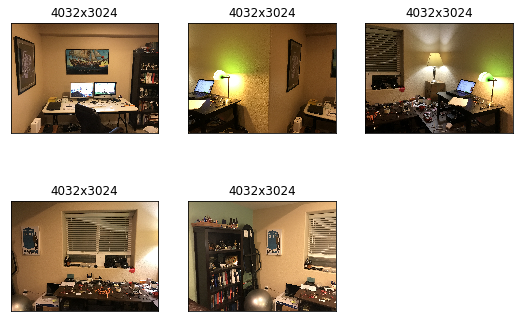

In [65]:
fname = [
    'stitch_pics/IMG_1508.JPG',
    'stitch_pics/IMG_1509.JPG',
    'stitch_pics/IMG_1510.JPG',
    'stitch_pics/IMG_1511.JPG',
    'stitch_pics/IMG_1512.JPG'
]

imgs2 = []
for f in fname:
    image = cv2.imread(f)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    imgs2.append(image)

# display the individual images
plt.figure(figsize=(9,6))  # width, height
for i, img in enumerate(imgs2):
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    h,w,_ = img.shape
    plt.title('{}x{}'.format(w,h))
    plt.xticks(())
    plt.yticks(())

True

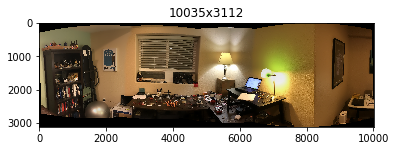

In [66]:
stitcher = cv2.createStitcher(True)
err, result = stitcher.stitch(imgs2)
if err:
    print("crap!")
    
# display
plt.imshow(result);
h,w,_ = ans.shape
plt.title('{}x{}'.format(w,h));

# save a high res copy to look at
ans = cv2.cvtColor(result,cv2.COLOR_RGB2BGR)
cv2.imwrite('office.png', ans)

# City

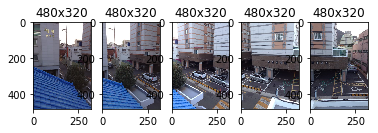

In [50]:
fname = [
    'stitching_img/S1.jpg',
    'stitching_img/S2.jpg',
    'stitching_img/S3.jpg',
    'stitching_img/S4.jpg',
    'stitching_img/S5.jpg'
]

imgs = []
for f in fname:
    image = cv2.imread(f)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    imgs.append(image)

# plt.imshow(imgs[0], cmap=plt.cm.gray);
# jt.imshow(imgs, width=5, bgr=False)
for i, img in enumerate(imgs):
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    w,h,_ = img.shape
    plt.title('{}x{}'.format(w,h))

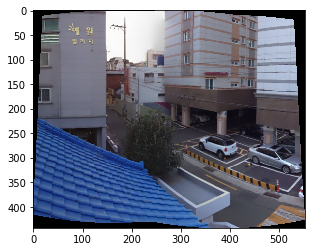

In [51]:
stitcher = cv2.createStitcher(False)
ret, result = stitcher.stitch(imgs)
plt.imshow(result);

# Denver Comic Con 2017

In [79]:
def stitch_imgs(imgs, gpu=False):
    """Not sure making a function saves us anything."""
    stitcher = cv2.createStitcher(gpu)
    err, result = stitcher.stitch(imgs)
    return result

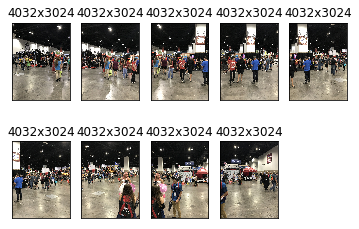

In [80]:
fname = map(lambda x:'comic_con/IMG_26{}.JPG'.format(x), range(28,37))
    
conimgs = []
for f in fname:
    image = cv2.imread(f)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    conimgs.append(image)

for i, img in enumerate(conimgs):
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    w,h,_ = img.shape
    plt.title('{}x{}'.format(w,h))
    plt.xticks(())
    plt.yticks(())

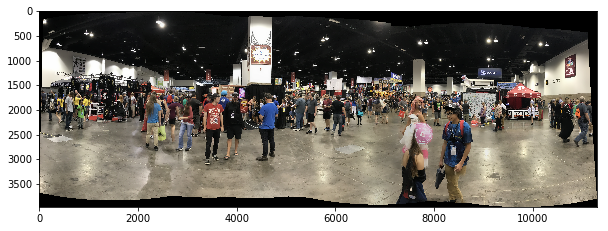

In [82]:
pan = stitch_imgs(conimgs, True)

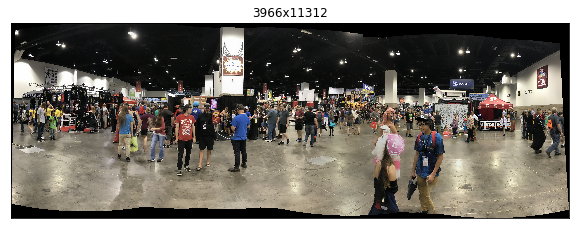

In [85]:
plt.figure(figsize=(10,6))  # width, height
plt.imshow(pan);
w,h,_ = pan.shape
plt.title('{}x{}'.format(w,h))
plt.xticks(())
plt.yticks(());

In [70]:
# save a high res copy to look at
ans = cv2.cvtColor(pan,cv2.COLOR_RGB2BGR)
cv2.imwrite('comic_con.png', ans)

True

Now, the pano has some issues. But you need to realize the environment was very dynamic (people moving) and I probably wasn't as fast or careful (trying to keep the camera in one place and just turn it nicely) taking the pictures. 

Take a look at the individual images, try to stitch them together with your eye. Try to match the background static objects (e.g., pillars, bannars, etc) that don't move. This will help you understand the dynamic object errors better.

My iPhone however, did a better job and using the sensors embedded in it, helps me take a faster, nicer picture. Here is the result:

![](iphone_pano.JPG)

We see the same scene with the same static background objects, however, there is a noticable difference in the dynamic parts (people) between the two sets of images. I tried to collect the individual images and iPhone pano as close together in time as I could so you could compare them better, but ...


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.